Task 1
Data Exploration and Basic Operations

Task 1.1: Load and Inspect Data

In [43]:
# importing necessary libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load Railway_info dataset

df = pd.read_csv("Railway_info.csv")


# Display first 10 rows
print("First 10 rows of the dataset: ")
print(df.head(10))

First 10 rows of the dataset: 
   Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
9       504  PNBE-BTI FTR                     PATNA JN.   

             Destination_Station_Name       days  
0                         MADGOAN JN.   Saturday  
1                     SAWANTWADI ROAD     Friday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                   DELHI-SAFDAR JANG  Wednesday  
4                        VARANASI JN.   Saturday  
5        SHRI

In [5]:
# Display the structure  of the data:
print("Structure of the data: ")
print(df.info())

Structure of the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Train_No                  11113 non-null  int64 
 1   Train_Name                11113 non-null  object
 2   Source_Station_Name       11113 non-null  object
 3   Destination_Station_Name  11113 non-null  object
 4   days                      11113 non-null  object
dtypes: int64(1), object(4)
memory usage: 434.2+ KB
None


In [6]:
# Display the data types

print("Data types: ")
print(df.dtypes)

Data types: 
Train_No                     int64
Train_Name                  object
Source_Station_Name         object
Destination_Station_Name    object
days                        object
dtype: object


In [7]:
#check missing values 

print("Missing values in each column: ")

print(df.isnull().sum())

Missing values in each column: 
Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64


In [8]:
#statistics  of numerical columns
print("Summary Statistics of the Numerical columns: ")
print(df.describe())

Summary Statistics of the Numerical columns: 
           Train_No
count  11113.000000
mean   49190.570413
std    28515.986645
min      107.000000
25%    22607.000000
50%    47174.000000
75%    68012.000000
max    99908.000000


Task 1.2: Basic Statistics

In [9]:
#Total number of trains

no_of_trains=len(df)
print("The number of trains: ", no_of_trains)

The number of trains:  11113


In [10]:
# Total number unique source stations

unique_source_stations = df['Source_Station_Name'].nunique()
print("Number of Unique Source Stations: ",unique_source_stations)

Number of Unique Source Stations:  921


In [11]:
# Total number Unique Destination Stations

unique_destination_stations = df['Destination_Station_Name'].nunique()
print("Number of Unique Destination Stations: ",unique_destination_stations)

Number of Unique Destination Stations:  924


In [12]:
# Most common Source Top 5 Stations

most_common_source = df["Source_Station_Name"].value_counts().head()
print("Most Common Source Stations:",most_common_source)


Most Common Source Stations: Source_Station_Name
CST-MUMBAI       513
SEALDAH          372
CHENNAI BEACH    339
HOWRAH JN.       338
KALYAN JN        285
Name: count, dtype: int64


In [13]:
# Most common Destination Top 5 Stations

most_common_destination = df["Destination_Station_Name"].value_counts().head()
print("Most Common Destination Stations:",most_common_destination)


Most Common Destination Stations: Destination_Station_Name
CST-MUMBAI       514
SEALDAH          373
CHENNAI BEACH    342
HOWRAH JN.       337
KALYAN JN        284
Name: count, dtype: int64


Task 1.3: Data Cleaning

In [14]:
# Missing Values

print("Missing values:",df.isnull().sum())

Missing values: Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64


In [15]:
# Convert source station names to uppercase

df['Source_Station_Name'] = df['Source_Station_Name'].str.upper()
print(df['Source_Station_Name'].head())

0      SAWANTWADI ROAD
1          MADGOAN JN.
2          MADGOAN JN.
3    DELHI-SAFDAR JANG
4           AURANGABAD
Name: Source_Station_Name, dtype: object


In [16]:
# Convert Destination station names to uppercase

df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper()
print(df['Destination_Station_Name'].head())

0                           MADGOAN JN.
1                       SAWANTWADI ROAD
2    CHHATRAPATI SHAHU MAHARAJ TERMINUS
3                     DELHI-SAFDAR JANG
4                          VARANASI JN.
Name: Destination_Station_Name, dtype: object


Task 2 Data Transformation and Aggregation


In [17]:
# Filter the rows to show the trains  day is Saturday

saturday_train = df[df['days'].str.lower() == 'saturday']

print("Trains Operates on Saturday:",saturday_train.head())

Trains Operates on Saturday:     Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
0        107  SWV-MAO-VLNK     SAWANTWADI ROAD              MADGOAN JN.   
4        401  BSB BHARATDA          AURANGABAD             VARANASI JN.   
21      1196  NGP-KRMI SPL      NAGPUR JN.(CR)                  KARMALI   
28      1706   JBP-BDTS SF            JABALPUR          BANDRA TERMINUS   
45      2834  SRC-RJT SF A     SANTRAGACHI JN.                   RAJKOT   

        days  
0   Saturday  
4   Saturday  
21  Saturday  
28  Saturday  
45  Saturday  


In [18]:
# Number of trains operates on saturday

print("Number of Trains operates on saturday:",len(saturday_train))

Number of Trains operates on saturday: 1441


In [19]:
# Specific Station

specific_station = 'VIJAYWADA JN.'
specific_station = specific_station.upper()

# Creating DataFrame for Specific Station

df_train_station = df[df['Source_Station_Name'] == specific_station]

print(df_train_station.head())

      Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
172       7062      VLNK-BZA       VIJAYWADA JN.            KAKINADA PORT   
186       7213       BZA-QLN       VIJAYWADA JN.                   QUILON   
218       7758   BZA-SC  SPL       VIJAYWADA JN.         SECUNDERABAD JN.   
507      12078   BZA-MAS-JAN       VIJAYWADA JN.          CHENNAI CENTRAL   
1084     12711  BZA-MAS PINA       VIJAYWADA JN.          CHENNAI CENTRAL   

         days  
172    Friday  
186    Friday  
218   Tuesday  
507   Tuesday  
1084   Friday  


Task 2.2: Grouping and Aggregation

In [25]:
# Group the data by source station

train_per_source = df.groupby('Source_Station_Name').size().reset_index(name='Train_Count')
print("Number of trains originating from each source station:")

#  Sort in descending order of Train Count
train_per_source = train_per_source.sort_values(by='Train_Count', ascending=False)

# Display the top 5 rows

print(train_per_source.head())

Number of trains originating from each source station:
    Source_Station_Name  Train_Count
224          CST-MUMBAI          513
773             SEALDAH          372
201       CHENNAI BEACH          339
373          HOWRAH JN.          338
426           KALYAN JN          285


In [27]:
# Group by source station and day of week to count trains

daily_counts = df.groupby(['Source_Station_Name', 'days']).size().reset_index(name='daily_train_count')


# Now calculate the average trains per day for each source station

avg_trains_per_day = daily_counts.groupby('Source_Station_Name')['daily_train_count'].mean().reset_index(name='avg_trains_per_day')

# Sort the result in descending order 

avg_trains_per_day = avg_trains_per_day.sort_values(by='avg_trains_per_day', ascending=False)

# Display the result

print("Average number of trains per day for each source station:")
print(avg_trains_per_day.head())

Average number of trains per day for each source station:
    Source_Station_Name  avg_trains_per_day
224          CST-MUMBAI           51.300000
773             SEALDAH           41.333333
426           KALYAN JN           40.714286
373          HOWRAH JN.           30.727273
843               THANE           26.571429


In [28]:
# Define a function to categorize days
def categorize_day(day):
    if day.lower() in ['saturday', 'sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column

df['day_type'] = df['days'].apply(categorize_day)


# Display the updated DataFrame

print("Data with new 'day_type' column:")

print(df[['days', 'day_type']].head())

Data with new 'day_type' column:
        days day_type
0   Saturday  Weekend
1     Friday  Weekday
2     Friday  Weekday
3  Wednesday  Weekday
4   Saturday  Weekend


Task 3: Advanced Data Analysis

Task 3.1: Pattern Analysis

C:\Users\lathe\AppData\Local\Temp\ipykernel_17812\1921241323.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")


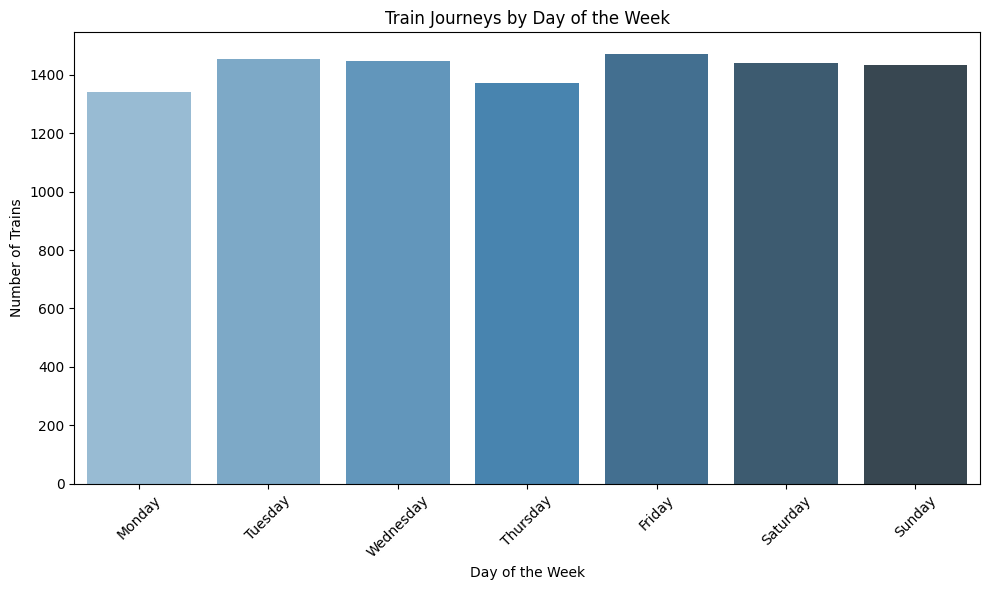

In [30]:
# Count the number of train journeys for each day of the week

day_counts = df['days'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


# Plot the distribution

plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")


# Customize the plot

plt.title('Train Journeys by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trains')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explore if there is any correlation between the number of trains and specific days of the week.

In [31]:
# Count how many times each source-destination pair occurs

route_counts = df.groupby(['Source_Station_Name', 'Destination_Station_Name']).size().reset_index(name='route_count')

# Sort by highest frequency
route_counts_sorted = route_counts.sort_values(by='route_count', ascending=False)

print("Top 10 most frequent source-destination routes:")
print(route_counts_sorted.head(10))


Top 10 most frequent source-destination routes:
     Source_Station_Name Destination_Station_Name  route_count
928        CHENNAI BEACH                 TAMBARAM          137
4400            TAMBARAM            CHENNAI BEACH          137
1127          CST-MUMBAI                   PANVEL           94
3490              PANVEL               CST-MUMBAI           93
3892            RAVLI JN               CST-MUMBAI           90
1129          CST-MUMBAI                 RAVLI JN           90
4716          VELACHEERY            CHENNAI BEACH           89
932        CHENNAI BEACH               VELACHEERY           87
1132          CST-MUMBAI                    THANE           77
4443               THANE               CST-MUMBAI           72


Task 3.2: Correlation and Insights

In [36]:
# Count the number of trains for each day of the week
day_counts = df['days'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Display the counts of trains for each day
print("Number of trains by day of the week:")
print(day_counts)


Number of trains by day of the week:
days
Monday       1342
Tuesday      1454
Wednesday    1448
Thursday     1372
Friday       1471
Saturday     1441
Sunday       1432
Name: count, dtype: int64


C:\Users\lathe\AppData\Local\Temp\ipykernel_17812\1121028728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")


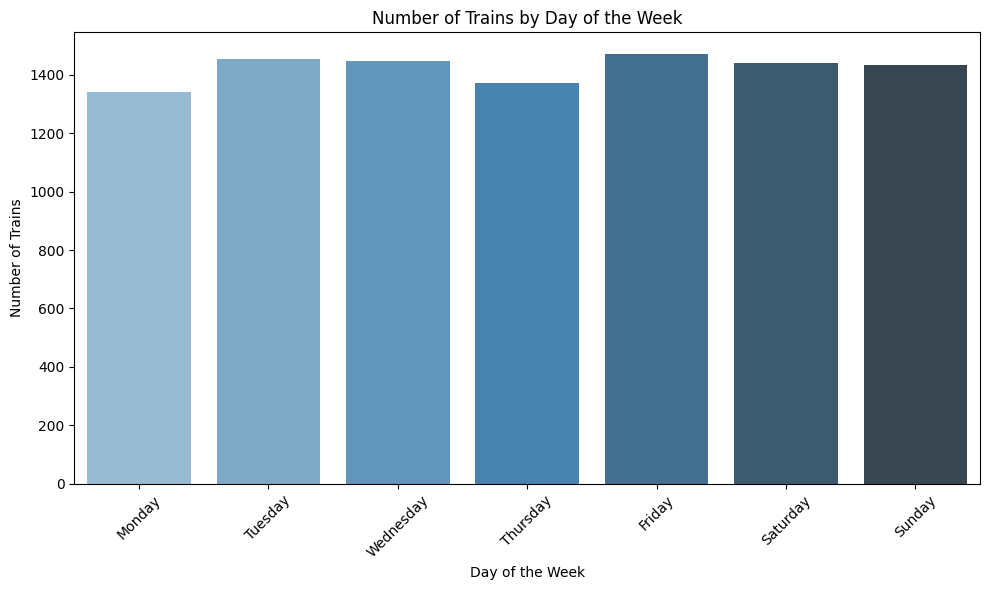

In [37]:


# Plot the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")

# Customize plot
plt.title("Number of Trains by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Convert 'day_of_week' to numeric values for correlation
day_numeric = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Create a numeric column for the days
df['day_numeric'] = df['days'].map(day_numeric)

# Group by day and count the number of trains
train_counts_per_day = df.groupby('day_numeric').size()

# Calculate correlation
correlation = train_counts_per_day.corr(pd.Series(train_counts_per_day.index))

print(f"Correlation between number of trains and days of the week: {correlation}")


Correlation between number of trains and days of the week: 0.4349711218634348


Provide insights and recommendations based on the analysis.

Train Frequency by Day of the Week (Bar Plot)

C:\Users\lathe\AppData\Local\Temp\ipykernel_17812\4000405892.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")


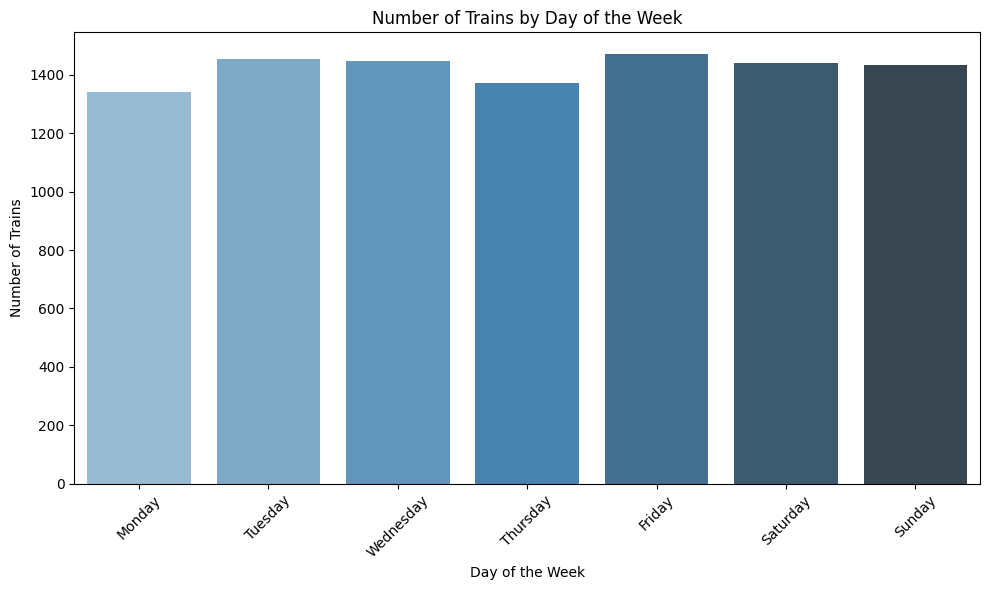

In [40]:

# Bar plot of number of trains by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="Blues_d")

# Customize plot
plt.title("Number of Trains by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Most Frequent Source-Destination Routes (Heatmap)

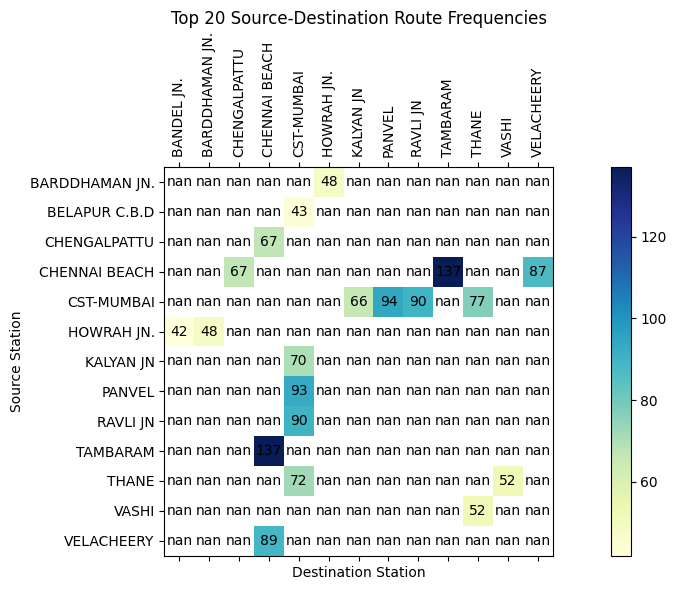

In [44]:
# Get top 20 most frequent source-destination pairs
top_routes = route_counts_sorted.head(20)

# Pivot the data for the heatmap
heatmap_data = top_routes.pivot(index="Source_Station_Name", columns="Destination_Station_Name", values="route_count")

# Plot the heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Create the heatmap
cax = ax.matshow(heatmap_data.values, cmap="YlGnBu")

# Add color bar
fig.colorbar(cax)

# Set x and y ticks to be the station names
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns, rotation=90)
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# Add annotations (values in each cell)
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        ax.text(j, i, f"{heatmap_data.values[i, j]:.0f}", ha='center', va='center', color='black')

# Title and labels
plt.title("Top 20 Source-Destination Route Frequencies")
plt.xlabel("Destination Station")
plt.ylabel("Source Station")

# Tight layout for better spacing
plt.tight_layout()
plt.show()


 3. Train Count by Day of the Week (Line Plot)

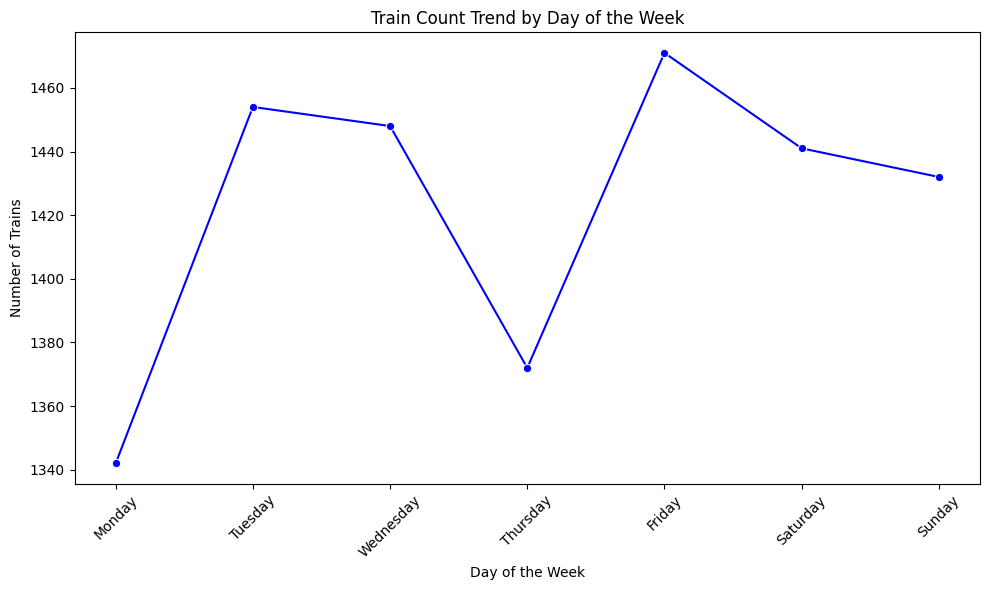

In [45]:
# Create a line plot for train counts by day of the week
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='b')

# Customize plot
plt.title("Train Count Trend by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Task 4: Data Visualization and Reporting

Task 4.1: Visualization

1. Number of Trains per Station (Bar Chart)

C:\Users\lathe\AppData\Local\Temp\ipykernel_17812\3337254580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")


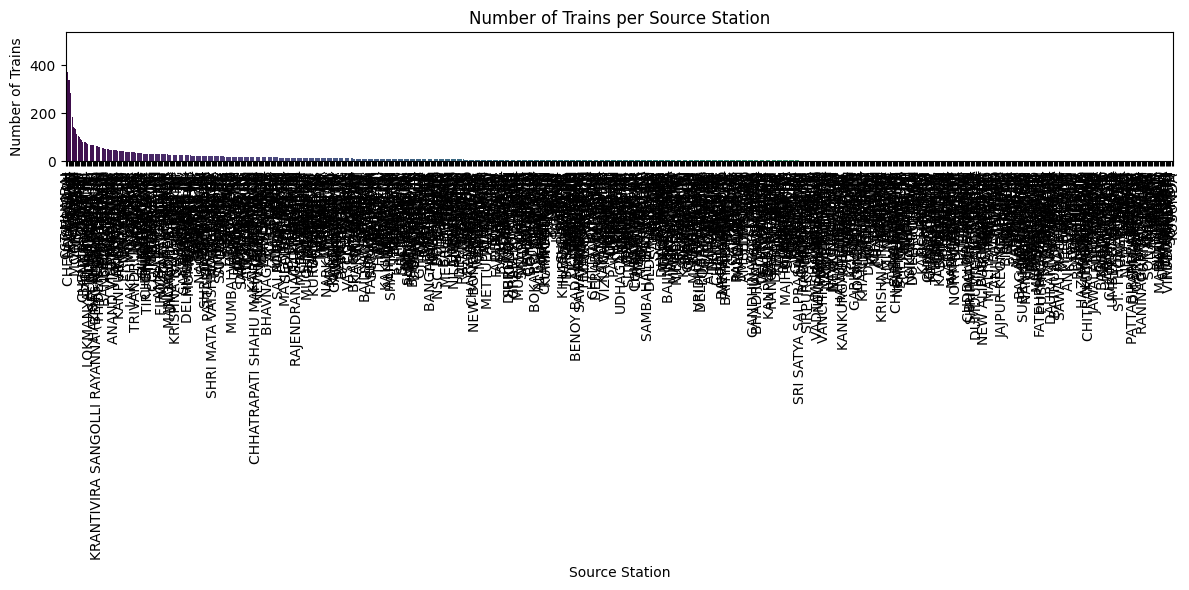

In [46]:
# Count the number of trains per source station
station_counts = df['Source_Station_Name'].value_counts()

# Plot a bar chart for the number of trains per station
plt.figure(figsize=(12, 6))
sns.barplot(x=station_counts.index, y=station_counts.values, palette="viridis")

# Customize plot
plt.title("Number of Trains per Source Station")
plt.xlabel("Source Station")
plt.ylabel("Number of Trains")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


2. Day-wise Distribution of Trains (Line Chart)

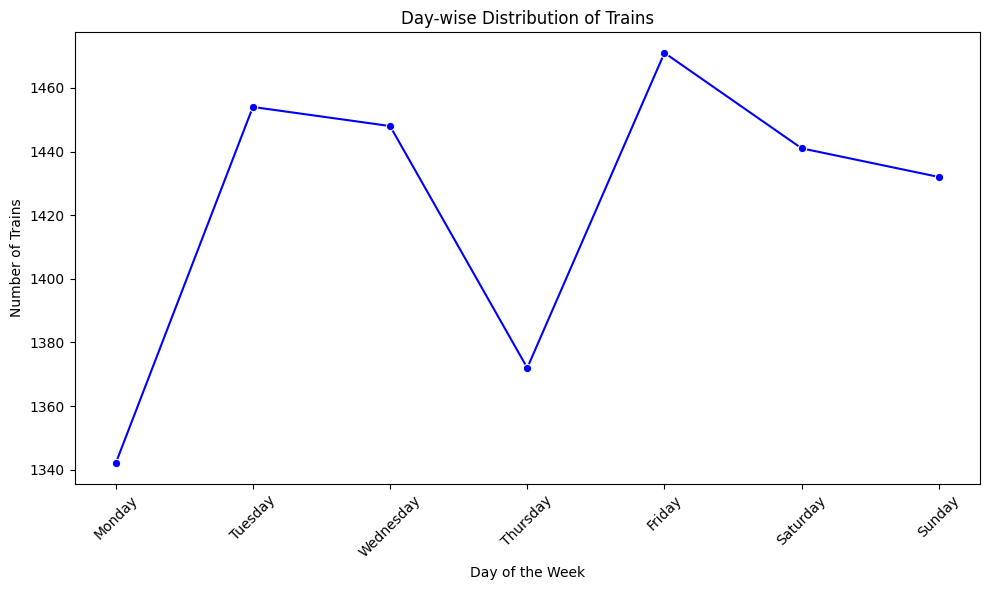

In [47]:
# Plot the day-wise distribution of trains as a line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='b')

# Customize plot
plt.title("Day-wise Distribution of Trains")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Most Frequent Source-Destination Routes (Heatmap)

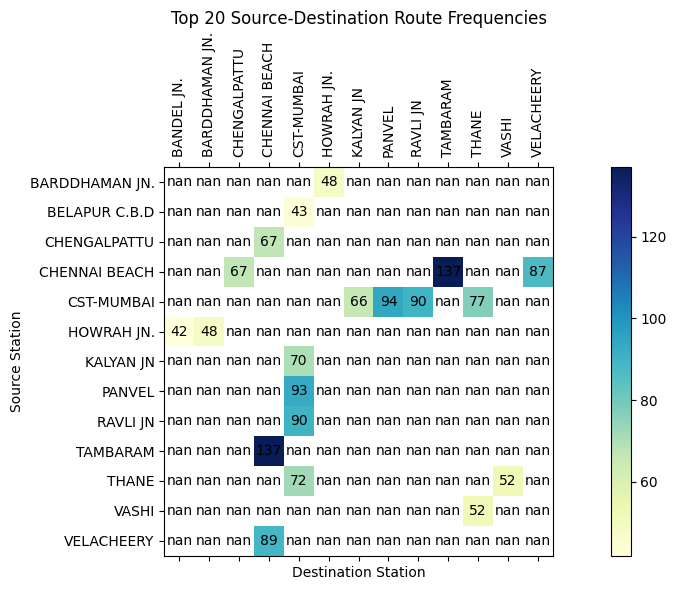

In [49]:
# Get top 20 most frequent source-destination pairs
top_routes = route_counts_sorted.head(20)

# Pivot the data for the heatmap
heatmap_data = top_routes.pivot(index="Source_Station_Name", columns="Destination_Station_Name", values="route_count")

# Plot the heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))

# Create the heatmap
cax = ax.matshow(heatmap_data.values, cmap="YlGnBu")

# Add color bar
fig.colorbar(cax)

# Set x and y ticks to be the station names
ax.set_xticks(np.arange(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns, rotation=90)
ax.set_yticks(np.arange(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# Add annotations (values in each cell)
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        ax.text(j, i, f"{heatmap_data.values[i, j]:.0f}", ha='center', va='center', color='black')

# Title and labels
plt.title("Top 20 Source-Destination Route Frequencies")
plt.xlabel("Destination Station")
plt.ylabel("Source Station")

# Tight layout for better spacing
plt.tight_layout()
plt.show()
